In [7]:
import json
import matplotlib.pyplot as plt
import pandas as pd

obj = json.load(open('results.json'))
obj

[{'round': 1, 'winner': 3, 'roll': 'pi', 'participants': ['pi', 'server']},
 {'round': 2, 'winner': 9, 'roll': 'server', 'participants': ['server']},
 {'round': 3, 'winner': 14, 'roll': 'server', 'participants': ['server']},
 {'round': 4,
  'winner': -1,
  'roll': "'Nobody participated'",
  'participants': []},
 {'round': 5, 'winner': 21, 'roll': 'pi', 'participants': ['server', 'pi']},
 {'round': 6,
  'winner': -1,
  'roll': "'Nobody participated'",
  'participants': []},
 {'round': 7, 'winner': 29, 'roll': 'pi', 'participants': ['server', 'pi']},
 {'round': 8, 'winner': 35, 'roll': 'win', 'participants': ['server', 'win']},
 {'round': 9, 'winner': 41, 'roll': 'pi', 'participants': ['pi']},
 {'round': 10,
  'winner': -1,
  'roll': "'Nobody participated'",
  'participants': []},
 {'round': 11,
  'winner': -1,
  'roll': "'Nobody participated'",
  'participants': []},
 {'round': 12, 'winner': 50, 'roll': 'pi', 'participants': ['pi']},
 {'round': 13,
  'winner': -1,
  'roll': "'Nobody par

In [8]:
df = pd.read_json('results.json')
df

,round,winner,roll,participants
0,1,3,pi,"[pi, server]"
1,2,9,server,[server]
2,3,14,server,[server]
3,4,-1,'Nobody participated',[]
4,5,21,pi,"[server, pi]"
...,...,...,...,...
295,296,1442,pi,[pi]
296,297,-1,'Nobody participated',[]
297,298,1449,win,[win]
298,299,1454,server,"[server, win]"


In [9]:
participations = {"server": {0: 0, 1: 0, 2: 0}, "win": {0: 0, 1: 0, 2: 0}, "pi": {0: 0, 1: 0, 2: 0}}
for i in range(len(obj)):
    part = obj[i]['participants']
    a = {"server": 0, "win": 0, "pi": 0}
    for p in part:
        a[p] += 1
    for k, v in a.items():
        participations[k][v] += 1
participations
    

{'server': {0: 150, 1: 150, 2: 0},
 'win': {0: 209, 1: 91, 2: 0},
 'pi': {0: 176, 1: 124, 2: 0}}

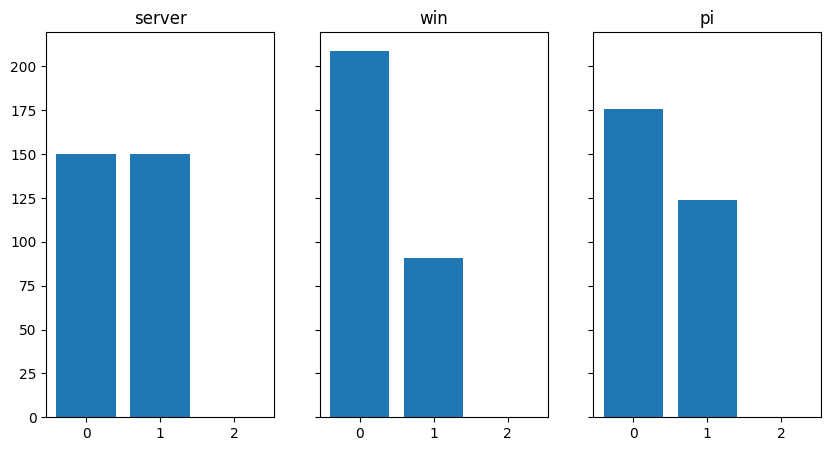

In [10]:
# plot participants into 3 subplots
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 5))
ax[0].bar(participations['server'].keys(), participations['server'].values(), label='server')
ax[1].bar(participations['win'].keys(), participations['win'].values(), label='win')
ax[2].bar(participations['pi'].keys(), participations['pi'].values(), label='pi')

ax[0].set_title('server')
ax[1].set_title('win')
ax[2].set_title('pi')


plt.show()

Text(0.5, 0, 'winner')

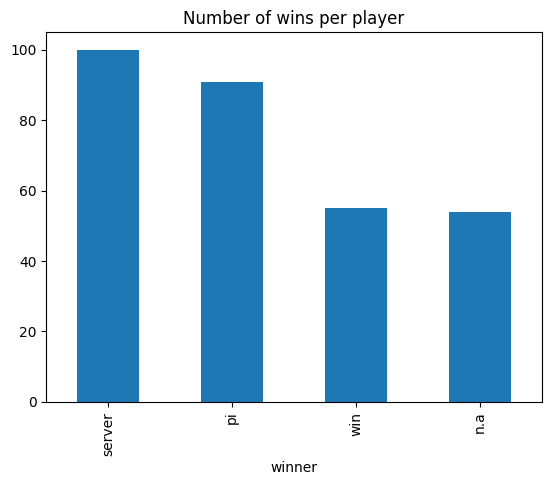

In [12]:
# barplots for the number of wins for player server, win, pi, Title "Number of wins" at the top
# replace 'Nobody participated' with 'No winner'
df["roll"].replace("'Nobody participated'", "n.a", inplace=True)
df["roll"].value_counts().plot(kind='bar')
plt.title("Number of wins per player")
plt.xlabel("winner")